In [1]:
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


I assume that you have downloaded the data from the book and put it in the data folder.

## Read in your data

In [ ]:
ozone = pd.read_csv('../data/hourly_44201_2014.csv')

In [4]:
ozone.rename(columns=lambda x: x.strip(" ").replace(' ', '_'), inplace=True)

In [5]:
ozone.columns

Index([u'State_Code', u'County_Code', u'Site_Num', u'Parameter_Code', u'POC',
       u'Latitude', u'Longitude', u'Datum', u'Parameter_Name', u'Date_Local',
       u'Time_Local', u'Date_GMT', u'Time_GMT', u'Sample_Measurement',
       u'Units_of_Measure', u'MDL', u'Uncertainty', u'Qualifier',
       u'Method_Type', u'Method_Code', u'Method_Name', u'State_Name',
       u'County_Name', u'Date_of_Last_Change'],
      dtype='object')

## Check the Packaging

In [6]:
ozone.shape

(9085391, 24)

In [7]:
# Number of rows
ozone.shape[0]

9085391

In [8]:
# Number of columns
ozone.shape[1]

24

In [9]:
len(ozone.columns)

24

## Look at the Top and the Bottom of your Data

In [10]:
ozone[ozone.columns[[5,6,9]]].head()

,Latitude,Longitude,Date_Local
0,30.498001,-87.881412,2014-03-01
1,30.498001,-87.881412,2014-03-01
2,30.498001,-87.881412,2014-03-01
3,30.498001,-87.881412,2014-03-01
4,30.498001,-87.881412,2014-03-01


In [11]:
ozone[ozone.columns[[5,6,9]]].tail()

,Latitude,Longitude,Date_Local
9085386,31.7122,-106.3953,2014-08-31
9085387,31.7122,-106.3953,2014-08-31
9085388,31.7122,-106.3953,2014-08-31
9085389,31.7122,-106.3953,2014-08-31
9085390,31.7122,-106.3953,2014-08-31


## ABC: Always be Checking Your “n”s

In [12]:
ozone.Time_Local.head()

0    01:00
1    02:00
2    03:00
3    04:00
4    05:00
Name: Time_Local, dtype: object

In [13]:
ozone.Time_Local.unique()

array(['01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00',
       '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00',
       '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00',
       '22:00', '23:00', '00:00'], dtype=object)

In [14]:
ozone[ozone.Time_Local == "13:14"]

,State_Code,County_Code,Site_Num,Parameter_Code,POC,Latitude,Longitude,Datum,Parameter_Name,Date_Local,...,Units_of_Measure,MDL,Uncertainty,Qualifier,Method_Type,Method_Code,Method_Name,State_Name,County_Name,Date_of_Last_Change


In [15]:
ozone.State_Name.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'Puerto Rico', 'Country Of Mexico'], dtype=object)

In [16]:
len(ozone.State_Name.unique())

53

## Validate With at Least One External Data Source

In [17]:
ozone.Sample_Measurement.describe()

count    9.085391e+06
mean     3.026188e-02
std      1.547955e-02
min      0.000000e+00
25%      1.900000e-02
50%      3.000000e-02
75%      4.100000e-02
max      2.410000e-01
Name: Sample_Measurement, dtype: float64

In [18]:
ozone.Sample_Measurement.quantile(np.arange(0,1.01,0.1))

0.0    0.000
0.1    0.009
0.2    0.016
0.3    0.022
0.4    0.026
0.5    0.030
0.6    0.034
0.7    0.039
0.8    0.043
0.9    0.050
1.0    0.241
Name: Sample_Measurement, dtype: float64

## Make a Plot

In [19]:
grouped = ozone.groupby(['State_Name'])

In [20]:
states = grouped.Sample_Measurement.groups.keys()
states.sort()
data = []
for state in states:
    data.append(grouped.Sample_Measurement.get_group(state))

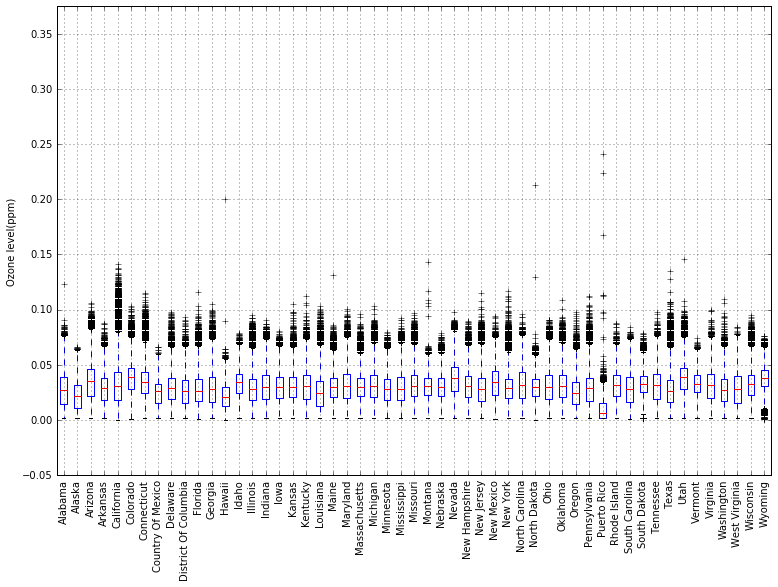

In [21]:
figsize(12.8, 8.4)
ax = pyplot.boxplot(data)
ax = pyplot.xticks(range(1,len(states)+1),states,rotation='vertical')
pyplot.grid(which='both')
pyplot.ylim([-0.05,0.375])
pyplot.ylabel('Ozone level(ppm)')